## Ising model, Monte Carlo simulation - Metropolis algorithm
    

In [106]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


In [107]:
print("Total energy - Hamiltonian defined as:")
display(Math(r'$H = -J_{ij}\sum_{<ij>}^{}s_{i}s_{j} - h\sum_{i}^{}s_{i}'))
print("Where: ")
display(Math(r'$J_{ij} - \text{Coupling parameter between adjecent atoms}'))
display(Math(r'$h - \text{External Fiels Strength}'))
display(Math(r'$s_{i, j} - \text{spin of particle}'))
             

Total energy - Hamiltonian defined as:


<IPython.core.display.Math object>

Where: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [175]:
class IsingModel(object):
    
    def __init__(self,N):
        self.N = N # grid size
        self.J = 1.0
        self.h = 0.0 # external field strength
        
        self.grid = 2*np.random.randint(2, size=(N,N))-1
        self.E = 0.0
        self.M = 0.0
        self.invBolzConst = 1.0 / (1.38*10**(-23))
        
    def AcceptMove(self, dE, T):
        '''Calculate probability for acceptance of move'''
        return np.exp(- ((float(dE) * (float(1/T)) )))
    
    def TotalEnergy(self, grid):
        ''' Hamiltonian calculation '''            
        energy = 0.0
        N = grid.shape[0]
        for i in range(len(grid)):
            for j in range(len(grid)):
                S = grid[i,j]
                nb = grid[(i+1)%N, j] + grid[i,(j+1)%N] + grid[(i-1)%N, j] + grid[i,(j-1)%N]
                energy += ((-nb*S)/2.0 - self.h*S)
        return energy
        
    def MCStep(self, T, equilibration=True):
        '''Monte Carlo simulation step'''
        # Flip of random spin
        #
        #
        #    http://web.mit.edu/krish_s/www/files/ising_Model.pdf
        #
        #
        #
        #
        a = np.random.randint(self.N)
        b = np.random.randint(self.N)
#         new_grid[a, b] *= -1
        s = self.grid[a,b]
        
        if(cost < 0):
            s*=-1
            self.grid[a,b] = s
            self.E = self.TotalEnergy(self.grid)
            self.M = self.Magnetization()
        elif np.random.random() < np.exp(-cost*(1.0/T)):
            s *= -1
            self.grid[a,b] = s
            self.E = self.TotalEnergy(self.grid)
            self.M = self.Magnetization()
        else:
            self.E = 0.0;
            self.M = 0.0;

        return self.grid

    def Magnetization(self):
        ''' Calculate magnetization of configuration'''
        return np.sum(self.grid)/(self.N*self.N)

In [170]:
def paint_grid(model, color):
    fig, ax = plt.subplots()
    ax.set_title("Snapshot of grid configuration")
    # im = ax.imshow(model.grid, cmap='YlGn')
    im = ax.imshow(model.grid, cmap=color)
    cbar = ax.figure.colorbar(im, ax=ax, )
    cbar.ax.set_ylabel(" ", rotation=-90, va="bottom")
    cbar.set_ticks([-1.0 , 1.0])
    cbar.values = [-1.0, 1.0]
    
def plot_results(E, M, temperatures):
    f = plt.figure(figsize=(18, 10)); # plot the calculated values    

    sp =  f.add_subplot(1, 2, 1 );
    plt.scatter(temperatures, E, s=50, marker='o', color='IndianRed')
    plt.xlabel("Temperature (T)", fontsize=20);
    plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

    sp =  f.add_subplot(1, 2, 2 );
    plt.scatter(temperatures, np.absolute(M), s=50, marker='o', color='RoyalBlue')
    plt.xlabel("Temperature (T)", fontsize=20); 
    plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');



In [171]:
temperature_points = 10
N = 10

# Allow the system to equilibriate (typically takes ∼N**3 iterations)
equilibration_steps = N**4   
mc_steps = N**3      #  number of MC sweeps for calculation

temperature_boundary = [0.1, 3.0]
temperatures = np.linspace(temperature_boundary[0], temperature_boundary[1], temperature_points)
n = 1.0/(mc_steps*N*N)
# normalize by number of samples

In [172]:
E = []
M = []
for idx, t in enumerate(temperatures):
    m = IsingModel(N)
    acc_E = 0.0
    acc_M = 0.0
    print("iteration:" + str(idx+1) + " of " + str(len(temperatures) ))
    for i in range(equilibration_steps):
        m.MCStep(t, equilibration=True)
        
        
    for i in range(mc_steps):
        m.MCStep(t,equilibration=False)
        acc_E +=m.E
        acc_M +=m.M
        
    E.append(n*acc_E)
    M.append(n*acc_M)

iteration:1 of 10
iteration:2 of 10
iteration:3 of 10
iteration:4 of 10
iteration:5 of 10
iteration:6 of 10
iteration:7 of 10
iteration:8 of 10
iteration:9 of 10
iteration:10 of 10


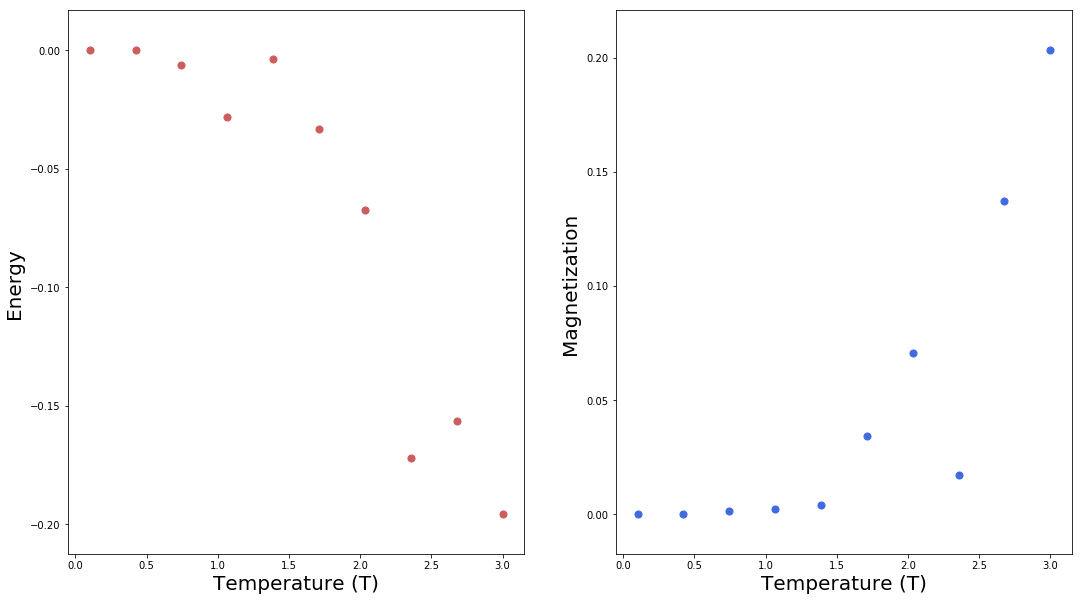

In [173]:
plot_results(E,M,temperatures)